In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
data= pd.read_csv('advertising.csv')

In [6]:
data.shape

(200, 4)

In [7]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

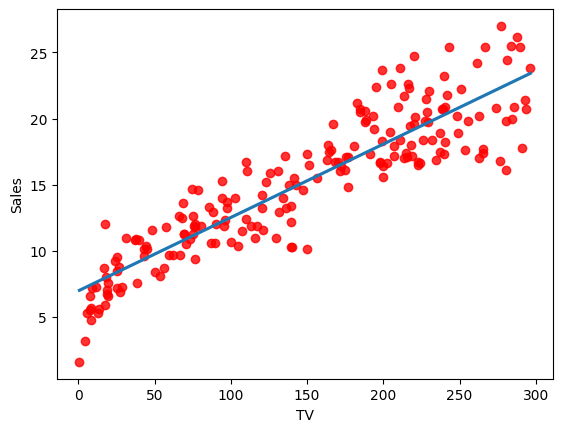

In [14]:
sns.regplot(data=data, x="TV", y="Sales", order=1, ci=None, scatter_kws={'color': 'r'})

<Axes: xlabel='Radio', ylabel='Sales'>

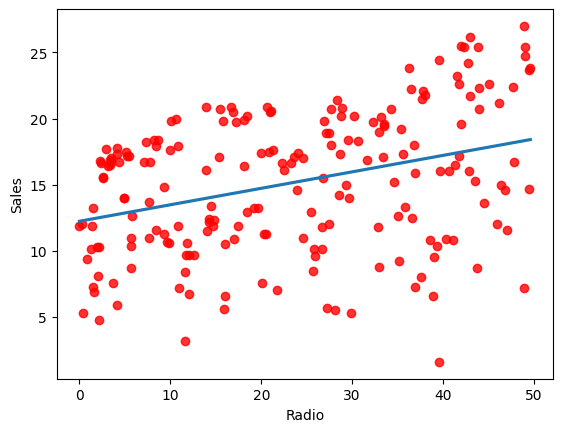

In [15]:
sns.regplot(data=data, x="Radio", y="Sales", order=1, ci=None, scatter_kws={'color': 'r'})

<Axes: xlabel='Newspaper', ylabel='Sales'>

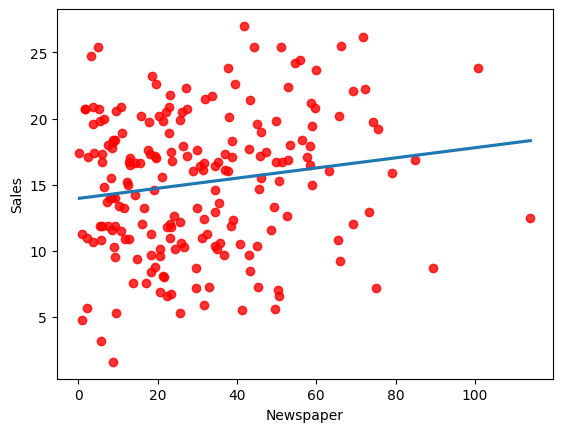

In [16]:
sns.regplot(data=data, x="Newspaper", y="Sales", order=1, ci=None, scatter_kws={'color': 'r'})

In [23]:
#Multiple Linear Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [24]:
regr = LinearRegression()
x = data[['TV']]
y = data[['Sales']]

In [25]:
regr.fit(x,y)

LinearRegression()

In [26]:
Sales_pred = regr.predict(x)

In [27]:
r2_score(y, Sales_pred)

0.8121757029987414

In [28]:
x = data[['TV','Radio','Newspaper']]
y = data[['Sales']]

In [29]:
regr.fit(x,y)

LinearRegression()

In [31]:
Sales_pred = regr.predict(x)

In [32]:
r2_score(y, Sales_pred)

0.9025912899684558

In [33]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [34]:
regr.fit(x_train,y_train)

LinearRegression()

In [35]:
Sales_pred = regr.predict(x_test)

In [36]:
r2_score(y_test, Sales_pred)

0.8884320661923949

In [37]:
#SVR
regressor = SVR(kernel='linear')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [38]:
y_pred = regressor.predict(x)

In [39]:
r2_score(y,regressor.predict(x))

0.9008636997581272

In [40]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [41]:
regressor = SVR(kernel='linear')
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [42]:
y_pred = regressor.predict(x_test)

In [43]:
r2_score(y_test, y_pred)

0.8624712878521097